## SVM 

*by Lena Nikolenko*

In order to deeper understand how Kernel trick works in SVM, I tried to predict classes for the following vectors: *A = [1, 0, 1.5], B = [-1, 2, -2], C = [0, 0.2, 0.7], D = [1, -2, 2.5]* using data from the file in this repository.

In [251]:
#Import necessary modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')
sns.color_palette('Set2')

# Import sklearn library for machine learning
from sklearn.svm import SVC, LinearSVC

In [252]:
#Initialize the train data
train_df = pd.read_csv('svm_data.csv', index_col=False)
train_df = pd.DataFrame(train_df)

In [253]:
#Initialize the test data A = [1, 0, 1.5], B = [-1, 2, -2], C = [0, 0.2, 0.7], D = [1, -2, 2.5]
test_df = pd.DataFrame({
    'x':[1,-1,0,1],
    'y':[0,2,0.2,-2],
    'z':[1.5,-2,0.7,2.5]})

Text(0.5, 0, 'Z')

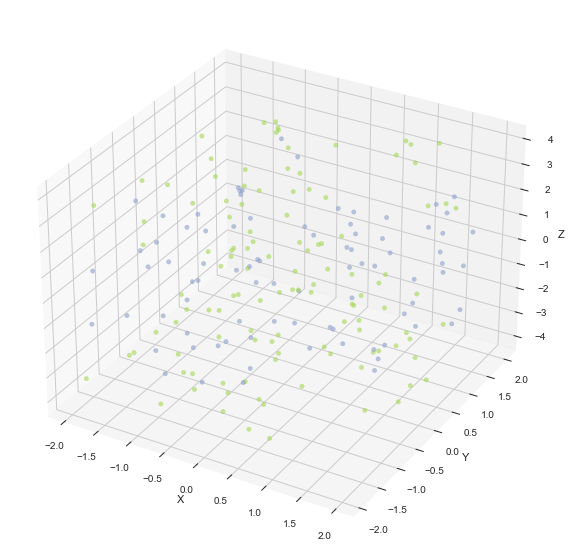

In [254]:
# Visualizing train data

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,  projection='3d')

x= train_df['x']
y= train_df['y']
z= train_df['z']
dict_colors = {0: '#a6d854', 1:'#8da0cb'}
colors = list(map(lambda x: dict_colors[x], train_df['class']))

ax.scatter(x, y, z, alpha=0.6, marker='o',c=colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [255]:
#Initiating the training samples X and an array y of class labels
X=train_df[['x','y', 'z']]
label=train_df['class']

## Check different ways of Kernel trick implementation

In [256]:
#Linearly unseparable data and linear kernel
claX=SVC(kernel='linear')
claX.fit(X,label)
acc_X=claX.score(X, label)

In [257]:
#Modifiyng linearly unseparable data to separable by creating 4th dimension with dot product manually
X1=train_df[['x','y','z']]
X1['dot'] = X.apply(lambda x: x['x']*x['x'] + x['y']*x['y'] + x['z']*x['z'], axis=1)
claX1=SVC(kernel='linear')
claX1.fit(X1,label)
acc_X1=claX1.score(X1, label)

In [244]:
#Modifiyng linearly unseparable data to separable by creating 4th dimension with dot product in numpy-way
Xnp = X.to_numpy()
dots = np.array([np.array([x.dot(x)]) for x in Xnp])
X2 = np.hstack([Xnp, dots])
claX2=SVC(kernel='linear')
claX2.fit(X2,label)
acc_X2=claX2.score(X2, label)

In [245]:
#Linearly unseparable data and rbf kernel from sklearn-library
cla_rbf=SVC(kernel='rbf')
cla_rbf.fit(X,label)
acc_rbf=cla_rbf.score(X, label)

In [258]:
#Let's see results
results = pd.DataFrame({'Implementation':['Linear kernel', 'Dot product (manually)','Dot product (numpy)','RBF kernel'],'Score': [acc_X, acc_X1, acc_X2, acc_rbf]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(4)

,Implementation
Score,
0.94,RBF kernel
0.79,Dot product (manually)
0.79,Dot product (numpy)
0.58,Linear kernel


## Prediction

Text(0.5, 0, 'Z')

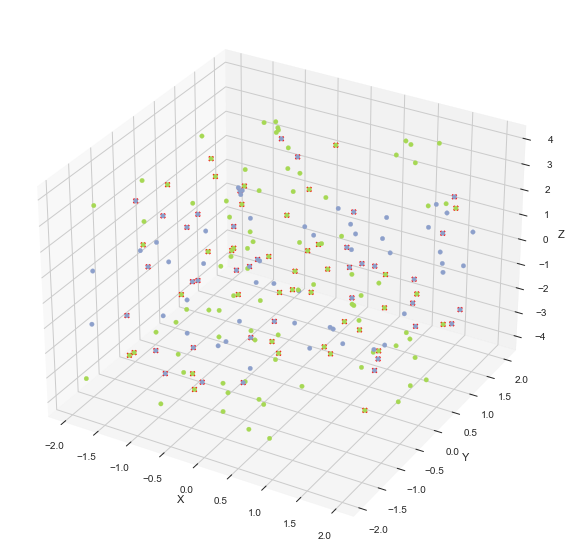

In [265]:
# Visualizing train data

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x= train_df['x']
y= train_df['y']
z= train_df['z']
dict_colors = {0: '#a6d854', 1:'#8da0cb'}
colors = list(map(lambda x: dict_colors[x], train_df['class']))

ax.scatter(x,y,z,alpha=1, marker='o',c=colors)
ax.scatter(supp[:,0],supp[:,1],supp[:,2],alpha=1,marker='x',c='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [266]:
#Let's predict class for our points
label_pred = cla_rbf.predict(test_df)
label_pred

array([0, 0, 1, 0])

So, for points A = [1, 0, 1.5], B = [-1, 2, -2], C = [0, 0.2, 0.7], D = [1, -2, 2.5] classes are 0,0,1,0.